**Bianry Image Classification using Data Augmentation on CNN(Convolutional Neural Network)**

In [16]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [18]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [19]:
import zipfile
zip_ref= zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [20]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras.preprocessing.image import ImageDataGenerator

In [21]:
batch_size=16
# Data Augmentation Configuration for trainning
train_datagen =ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Data Augmentation Configuration for testing
test_datagen =ImageDataGenerator(rescale=1./255)

In [22]:
#Generators that will read pictures found in subfolders of train
#and indefinetely generate batches of augmented image data
train_generator= train_datagen.flow_from_directory(
    '/content/train',
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary',
)

# Genrator for validation data
validation_generator= train_datagen.flow_from_directory(
    '/content/test',
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary',
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

In [24]:
model=Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))


In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 64)       

In [29]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [30]:
history=model.fit_generator(train_generator,
    steps_per_epoch=20000 // batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=5000 // batch_size)

Epoch 1/5


<ipython-input-30-012087acc91a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator,


1250/1250 [==============================] - 187s 149ms/step - loss: 0.6321 - accuracy: 0.6337 - val_loss: 0.5823 - val_accuracy: 0.6877
Epoch 2/5
1250/1250 [==============================] - 181s 145ms/step - loss: 0.5302 - accuracy: 0.7387 - val_loss: 0.4907 - val_accuracy: 0.7620
Epoch 3/5
1250/1250 [==============================] - 184s 147ms/step - loss: 0.4841 - accuracy: 0.7688 - val_loss: 0.4335 - val_accuracy: 0.8047
Epoch 4/5
1250/1250 [==============================] - 182s 146ms/step - loss: 0.4535 - accuracy: 0.7926 - val_loss: 0.4104 - val_accuracy: 0.8183
Epoch 5/5
1250/1250 [==============================] - 175s 140ms/step - loss: 0.4310 - accuracy: 0.8082 - val_loss: 0.3979 - val_accuracy: 0.8231


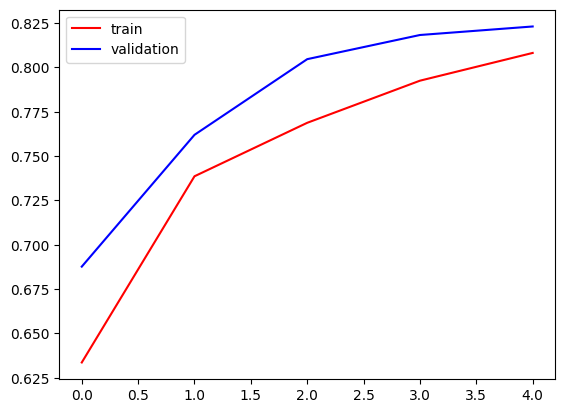

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

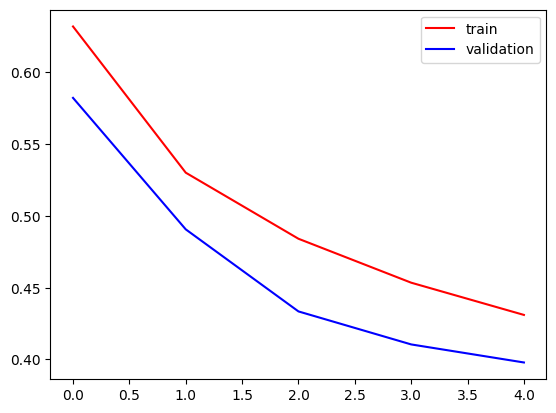

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()